In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [2]:
adult_income = pd.read_csv('adult.csv')

In [3]:
adult_income

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
adult_income.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [5]:
adult_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [6]:
gender_distribution = adult_income['gender'].value_counts()
print(gender_distribution)

gender
Male      32650
Female    16192
Name: count, dtype: int64


Text(0, 0.5, 'Count')

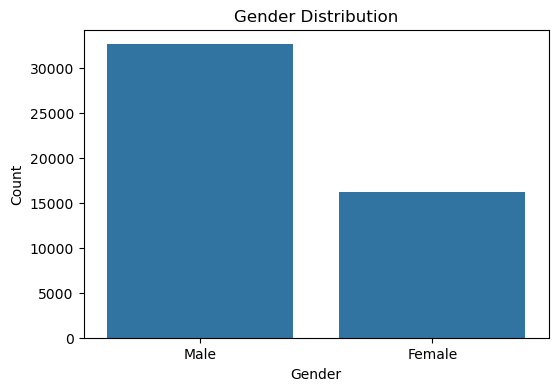

In [7]:
plt.figure(figsize=(6, 4))
sns.countplot(x='gender', data=adult_income)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')


### A higher proportion of males earn more than 50k compared to females.

Text(0, 0.5, 'Count')

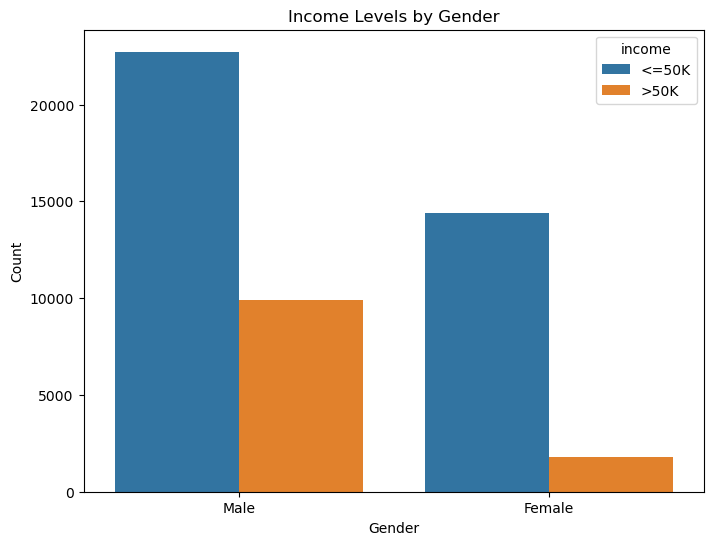

In [8]:
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', hue='income', data=adult_income)
plt.title('Income Levels by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')


In [9]:
adult_income['education'].unique()

array(['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th',
       'Prof-school', '7th-8th', 'Bachelors', 'Masters', 'Doctorate',
       '5th-6th', 'Assoc-voc', '9th', '12th', '1st-4th', 'Preschool'],
      dtype=object)

In [10]:
hihg_learning = adult_income[adult_income['education'].isin(['HS-grad', 'Bachelors', 'Masters', 'Doctorate'])]
male = hihg_learning[hihg_learning['gender'] == 'Male']
female = hihg_learning[hihg_learning['gender'] == 'Female']
male

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
10,65,Private,184454,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,6418,0,40,United-States,>50K
11,36,Federal-gov,212465,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,<=50K
13,58,?,299831,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,35,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48828,43,Private,260761,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,Mexico,<=50K
48834,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K
48835,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K


### Men with higher education are more likely to be husbands, while women with higher education are more likely to be single.

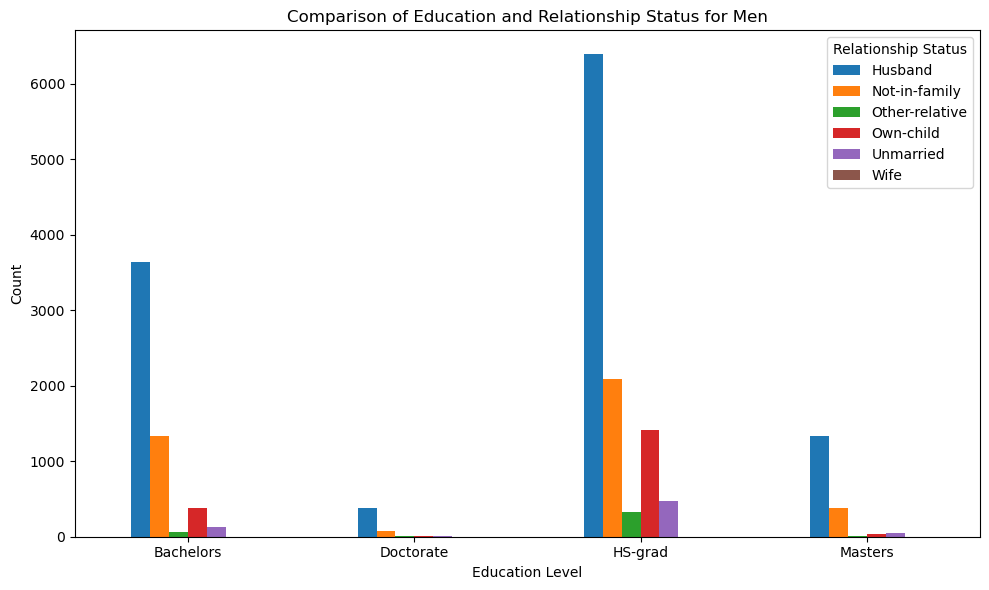

In [11]:
education_relationship_counts = male.groupby(['education', 'relationship']).size().unstack()

education_relationship_counts.plot(kind='bar', figsize=(10, 6))

plt.title('Comparison of Education and Relationship Status for Men')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Relationship Status')
plt.tight_layout()

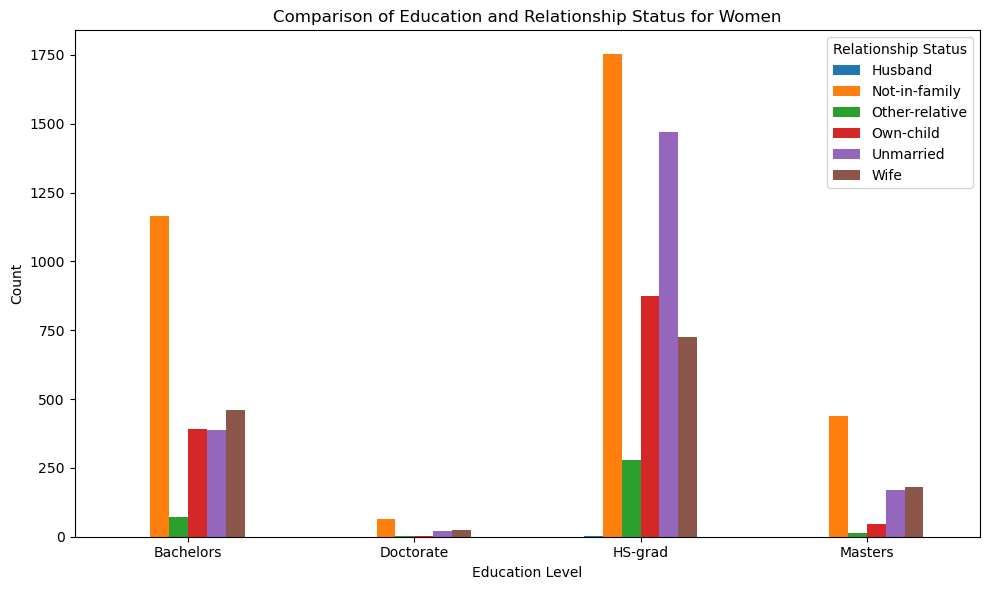

In [12]:
education_relationship_counts = female.groupby(['education', 'relationship']).size().unstack()

education_relationship_counts.plot(kind='bar', figsize=(10, 6))

plt.title('Comparison of Education and Relationship Status for Women')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Relationship Status')
plt.tight_layout()

# Gender Analysis in Adult Income Dataset

## Explore the following questions:

1. How does income distribution vary between males and females? Males generally have a higher income than females.

2. Are there any noticeable trends in the data related to gender and income? More men are unmarried and lack higher education compared to women, but unmarried men are more likely to have children than unmarried women.
   
3. How do the relationship statuses of men and women compare across different education levels? Men with higher education are more likely to be married, while women with higher education are more likely to be single.

